In [229]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from custom_dataloader import replicate_data, replicate_data_single
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay,accuracy_score,f1_score,classification_report


In [2]:
CIII = True # Train with Class III as a possible class
# YSO_EG_Stars Train
file_inp = "c2d_w_quality.csv"
input = pd.read_csv(file_inp)
bands = [idx for idx in input.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]
bands = bands[:-2]
bands.append("alpha")

inp_tr, tar_tr,inp_va, tar_va,inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,20000])# 171,133,693,219,1974,2500
# while np.all(np.isfinite(inp_tr)) == False:
    # inp_tr, tar_tr, inp_va, tar_va, inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,20000])# 171,133,693,219,1974,2500
# print('Assigned training, validation, and test sets.')

val = pd.read_csv("CC_w_Preds.csv")
bands = [idx for idx in val.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]

bands.append("alpha")
print(bands)
inp_CC = val[bands].values.astype(float)
tar_CC = val[['Preds']].values.astype(int)

inp_tr, tar_tr,inp_va, tar_va,inp_te, tar_te = replicate_data(input[bands].values.astype(float), input[['Target']].values.astype(int),[3000]*3,[1000,1650,20000])# 171,133,693,219,1974,2500
inp_va, tar_va = inp_CC, tar_CC

['mag_J', 'e_mag_J', 'mag_H', 'e_mag_H', 'mag_Ks', 'e_mag_Ks', 'mag_IR1', 'e_mag_IR1', 'mag_IR2', 'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4', 'alpha']


In [18]:
rf = RandomForestClassifier()

rf.fit(inp_tr,tar_tr.ravel())

pred_tr = rf.predict(inp_tr)
pred_va = rf.predict(inp_va)


/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


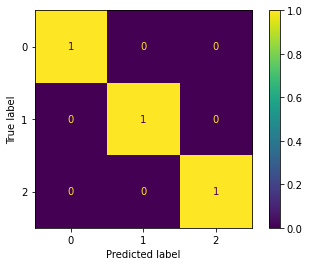

In [4]:
plot_confusion_matrix(rf,inp_tr,tar_tr,normalize='true')

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


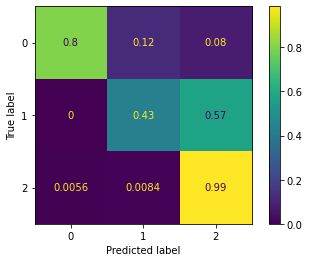

In [ ]:
plot_confusion_matrix(rf,inp_va,tar_va)#,normalize='true'

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


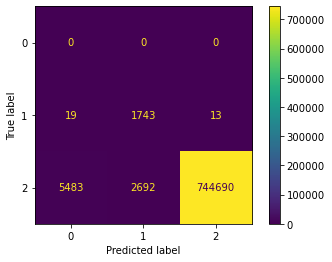

In [6]:
plot_confusion_matrix(rf,inp_te,tar_te)

In [7]:
print(bands)

['mag_J', 'e_mag_J', 'mag_H', 'e_mag_H', 'mag_Ks', 'e_mag_Ks', 'mag_IR1', 'e_mag_IR1', 'mag_IR2', 'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4', 'alpha']


# PRF

In [8]:
from PRF import prf

In [9]:
val = pd.read_csv("CC_w_Preds.csv")
bands = [idx for idx in val.columns.values if (idx[0].lower() == 'm'.lower() or idx[0].lower() == 'e'.lower())]

bands.append("alpha")
print(bands)
# print(f"YSO shape: {input[input['Target']==0].shape}")
# print(f"EG shape: {input[input['Target']==1].shape}")
# print(f"Star shape: {input[input['Target']==2].shape}")


# input['Target']=preproc_yso(input[['alpha']].values,input[['Target']].values,CIII)

# inp_CC, tar_CC = replicate_data_single(val[bands].values.astype(float), val[['Preds']].values.astype(int),[val[val['Preds']==0].shape[0],val[val['Preds']==1].shape[0],val[val['Preds']==2].shape[0]])# 171,133,693,219,1974,2500
inp_CC = val[bands].values.astype(float)
tar_CC = val[['Preds']].values.astype(int)

['mag_J', 'e_mag_J', 'mag_H', 'e_mag_H', 'mag_Ks', 'e_mag_Ks', 'mag_IR1', 'e_mag_IR1', 'mag_IR2', 'e_mag_IR2', 'mag_IR3', 'e_mag_IR3', 'mag_IR4', 'e_mag_IR4', 'alpha']


In [10]:
# X_train = inp_tr[:,(0,2,4,6)]
# dX_train = inp_tr[:,(1,3,5,7)]
# y_train = tar_tr
# X_val = inp_va[:,(0,2,4,6)]
# dX_val = inp_va[:,(1,3,5,7)]
# y_val = tar_va
# X_test = inp_va[:,(0,2,4,6)]
# dX_test = inp_va[:,(1,3,5,7)]
# y_test = tar_va

X_train = inp_tr[:,(0,2,4,6,8,10,12)]
dX_train = inp_tr[:,(1,3,5,7,9,11,13)]
y_train = tar_tr

X_val = inp_CC[:,(0,2,4,6,8,10,12)]
dX_val = inp_CC[:,(1,3,5,7,9,11,13)]
y_val = tar_CC

X_test = inp_te[:,(0,2,4,6,8,10,12)]
dX_test = inp_te[:,(1,3,5,7,9,11,13)]
y_test = tar_te




In [11]:

prf_cls = prf(n_estimators=100, bootstrap=True, keep_proba=0.05)
prf_cls.fit(X=X_train, dX=dX_train, y=y_train)

ProbabilisticRandomForestClassifier(n_estimators_='100', criterion='gini', max_features='auto', max_depth='None', keep_proba='0.05', bootstrap='True', min_py_sum_leaf='1', n_features_='7', feature_importances_='[0.05188105 0.04680665 0.06204461 0.05207718 0.10920407 0.15223803
 0.30829733]', max_features_num='2', unsupervised='False', n_classes_='3')

In [12]:

pred_tr = prf_cls.predict(X=X_train, dX=dX_train)
pred_te = prf_cls.predict(X=X_test, dX=dX_test)

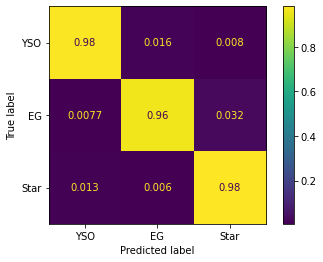

In [13]:
ConfusionMatrixDisplay.from_predictions(tar_tr,pred_tr,normalize='true',display_labels=['YSO','EG','Star'])

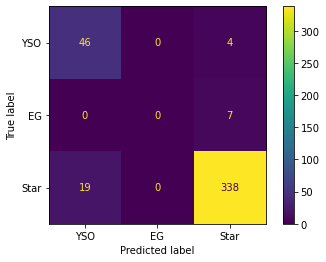

In [14]:

pred_va = prf_cls.predict(X=X_val, dX=dX_val)
ConfusionMatrixDisplay.from_predictions(y_val,pred_va,display_labels=['YSO','EG','Star'])

In [19]:
val.head()
val['RF_Preds'] = pred_va


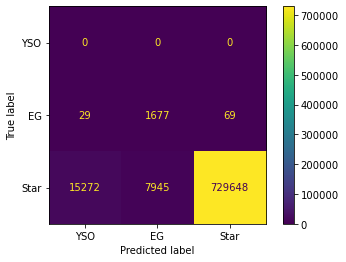

In [16]:
ConfusionMatrixDisplay.from_predictions(tar_te,pred_te,display_labels=['YSO','EG','Star'])

In [20]:
val.to_csv('CC_w_Preds_RF.csv')

# JWST Classification

In [158]:
bands

['aper50_vegamag_f090w',
 'aper50_vegamag_err_f090w',
 'aper50_vegamag_f187n',
 'aper50_vegamag_err_f187n',
 'aper50_vegamag_f335m',
 'aper50_vegamag_err_f335m',
 'aper50_vegamag_f444w',
 'aper50_vegamag_err_f444w',
 'aper50_vegamag_f444w-f470n',
 'aper50_vegamag_err_f444w-f470n']

In [799]:
webb_inp = pd.read_csv('/Users/breannacrompvoets/Documents/Star_Formation/YSO+Classification/NGC_3324/CC_JWST_Full_Nov152022_vegamag.csv')
all_inp = pd.read_csv('CC_Webb_Spitz_2m_w_Preds.csv')
print(len(all_inp))

bands = [idx for idx in all_inp.columns.values if (idx[:3].lower() == 'iso'.lower())]
bands.remove('isophotal_vegamag_f444w-f470n')
bands.remove('isophotal_vegamag_err_f444w-f470n')
# all_inp.dropna(subset=bands[-2:],inplace=True)
print(bands)
input_webb = all_inp[bands].to_numpy()
tar_webb = all_inp[["Preds"]].to_numpy()
tar_webb[tar_webb==2] = 1
print(np.unique(tar_webb))


497
['isophotal_vegamag_f090w', 'isophotal_vegamag_err_f090w', 'isophotal_vegamag_f187n', 'isophotal_vegamag_err_f187n', 'isophotal_vegamag_f200w', 'isophotal_vegamag_err_f200w', 'isophotal_vegamag_f335m', 'isophotal_vegamag_err_f335m', 'isophotal_vegamag_f444w', 'isophotal_vegamag_err_f444w']
[0. 1.]


In [800]:
inp_tr, tar_tr = replicate_data_single(input_webb,tar_webb,amounts=[len(tar_webb[tar_webb==0])]*2)
# while np.all(np.isfinite(inp_tr)) == False:
#     inp_tr, tar_tr = replicate_data_single(input_webb,tar_webb,amounts=[len(tar_webb[tar_webb==0])]*2)
webb_inp_tar = np.random.randint(low = 0,high=2,size=webb_inp.shape[0])
inp_te, tar_te = replicate_data_single(webb_inp[np.r_[['RA','DEC','size'],bands]].to_numpy(),webb_inp_tar,amounts=[len(webb_inp_tar[webb_inp_tar==0]),len(webb_inp_tar[webb_inp_tar==1])])
inp_te_radec = inp_te[:,:3]
inp_te = inp_te[:,3:]


inp_va, tar_va = replicate_data_single(input_webb,tar_webb,amounts=[len(tar_webb[tar_webb==0]),len(tar_webb[tar_webb==1])])


X_train = inp_tr[:,(0,2,4,6,8)]
dX_train = inp_tr[:,(1,3,5,7,9)]
dX_train = np.array([[0.1,0.1,0.1,0.1,0.1]]*len(tar_tr))
y_train = tar_tr



X_val = inp_va[:,(0,2,4,6,8)]
dX_val = inp_va[:,(1,3,5,7,9)]
dX_val = np.array([[0.1,0.1,0.1,0.1,0.1]]*len(tar_va))
y_val = tar_va


X_test = inp_te[:,(0,2,4,6,8)]
dX_test = inp_te[:,(1,3,5,7,9)]
dX_test = np.array([[0.1,0.1,0.1,0.1,0.1]]*len(X_test))
# y_test = tar_te

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.83        68
         1.0       0.79      0.97      0.87        68

    accuracy                           0.85       136
   macro avg       0.87      0.85      0.85       136
weighted avg       0.87      0.85      0.85       136

175
94802


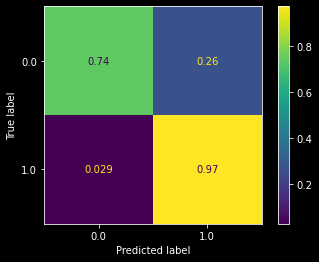

In [801]:

prf_cls = prf(n_estimators=100, bootstrap=True, keep_proba=0.8)
prf_cls.fit(X=X_train, dX=dX_train, y=y_train)

pred_tr = prf_cls.predict(X=X_train, dX=dX_train)
print(classification_report(tar_tr,pred_tr))

ConfusionMatrixDisplay.from_predictions(tar_tr,pred_tr,normalize='true')


pred_te = prf_cls.predict(X=X_test, dX=dX_test)

print(len(pred_te[pred_te==0]))
print(len(pred_te[pred_te==1]))

              precision    recall  f1-score   support

         0.0       0.50      0.74      0.60        68
         1.0       0.95      0.88      0.92       429

    accuracy                           0.86       497
   macro avg       0.73      0.81      0.76       497
weighted avg       0.89      0.86      0.87       497



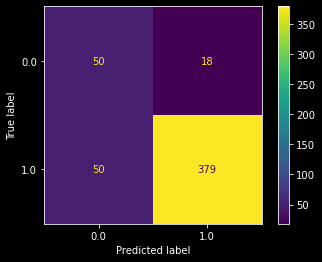

In [802]:

pred_va = prf_cls.predict(X=X_val, dX=dX_val)
print(classification_report(tar_va,pred_va))

ConfusionMatrixDisplay.from_predictions(tar_va,pred_va)

/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'datfix' made the change 'Set DATE-BEG to '2022-06-03T10:07:58.266' from MJD-BEG.
Set DATE-AVG to '2022-06-03T12:45:26.346' from MJD-AVG.
Set DATE-END to '2022-06-03T15:22:38.772' from MJD-END'.
  warnings.warn(
/Users/breannacrompvoets/miniforge3/envs/SF/lib/python3.10/site-packages/astropy/wcs/wcs.py:725: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -82.723261 from OBSGEO-[XYZ].
Set OBSGEO-B to   -31.574327 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654444171.915 from OBSGEO-[XYZ]'.
  warnings.warn(


159.09784709430238
159.17624999999995


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

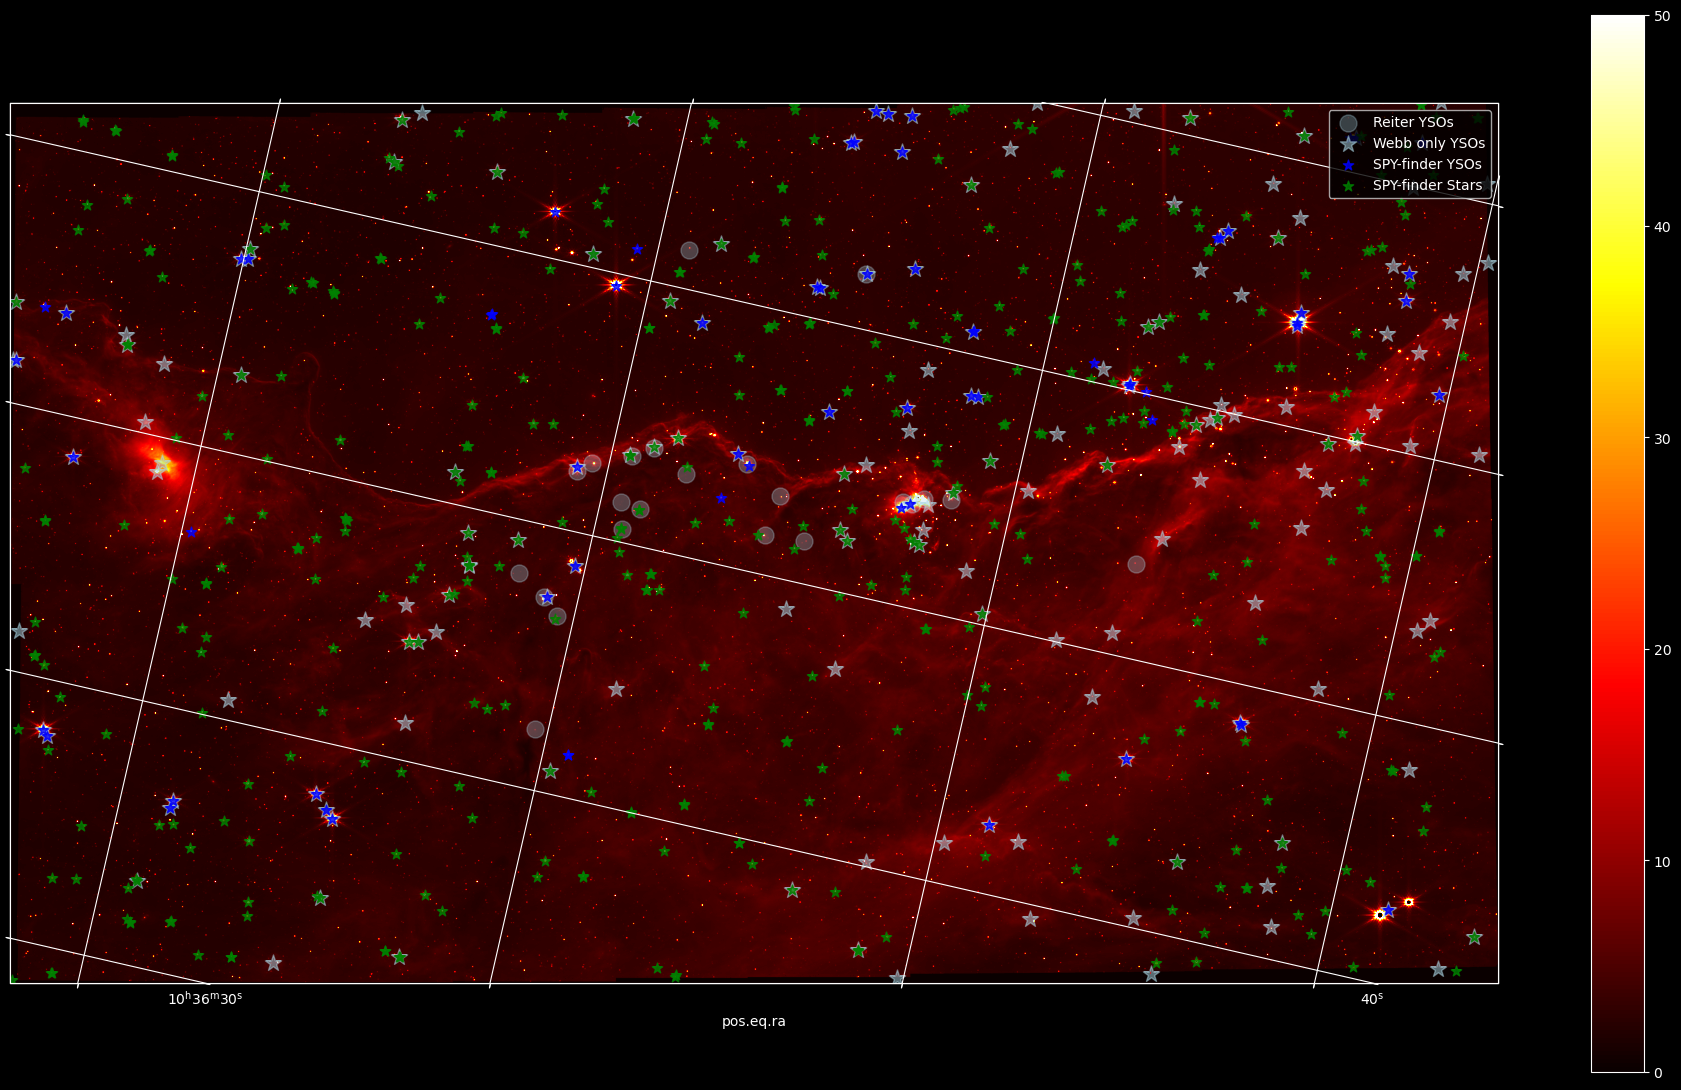

In [805]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u


# Plot image
filter = "f444w"
image_file = f"../../../ngc3324/FITS/JWST_{filter}.fits"


h = fits.getheader(image_file)

f = fits.open(image_file)

wcs = WCS(f[1].header)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(24,14),dpi=100)
ax = plt.subplot(projection=wcs)

plt.grid(color='white', ls='solid')
plt.imshow(f[1].data,cmap='hot',vmin=0,vmax=50,origin='lower') #vmax =1500 for f1800w
ymax, ymin = ax.get_ylim()
xmax, xmin = ax.get_xlim()
plt.colorbar()

ras, decs = wcs.wcs_pix2world(np.linspace(-500,15000,100), np.linspace(-500,16000,100), 1)
print(min(ras))

reit = ["10:36:42.3 -58:38:04", "10:36:48.0 -58:38:19", "10:36:47.3 -58:38:10", "10:36:46.7 -58:38:05", "10:36:51.5 -58:37:54", "10:36:50.5 -58:37:52",\
    "10:36:51.4 -58:37:48", "10:36:53.8 -58:37:48", "10:36:51.5 -58:37:10", "10:36:54.2 -58:36:26", "10:36:54.4 -58:36:18", "10:36:54.0 -58:37:20",\
        "10:36:53.6 -58:35:20", "10:36:53.1 -58:37:37", "10:36:53.3 -58:37:54", "10:36:52.7 -58:38:05", "10:36:53.1 -58:37:08", "10:36:51.6 -58:36:58",\
        "10:36:52.3 -58:38:09", "10:36:53.9 -58:36:29", "10:37:01.5 -58:37:51", "10:37:02.1 -58:36:58", "10:36:53.9 -58:36:32"]# End of third row is the end of MHO-only sources
sky_1 = SkyCoord(reit,unit=(u.hourangle, u.deg))
ra_1 = sky_1.ra
dec_1 = sky_1.dec

reit_eg = ["10:36:53.7 -58:35:47", "10:36:59.5 -58:39:01", "10:37:07.2 -58:35:36", "10:36:55.2 -58:38:09"]
sky_1 = SkyCoord(reit_eg,unit=(u.hourangle, u.deg))
ra_eg = sky_1.ra
dec_eg = sky_1.dec


yso = np.where(pred_te==0)[0]
# egs = np.where(np8[:,-1]==1)[0]
sta = np.where(pred_te==1)[0]
print(ra_1[0]/u.deg)
tol = 0.000117
plt.scatter(ra_1,dec_1, marker='o', c='lightblue',s=150, alpha=0.3,transform=ax.get_transform('fk5'),label='Reiter YSOs')
# plt.scatter(webb_inp.iloc[sta].RA,webb_inp.iloc[sta].DEC, marker='*', c='gray',s=60, alpha=0.1,transform=ax.get_transform('fk5'),label='Webb only Stars')
plt.scatter(inp_te_radec[yso,0],inp_te_radec[yso,1], marker='*', c='lightblue',s=150, alpha=0.5,transform=ax.get_transform('fk5'),label='Webb only YSOs')
plt.plot([inp_te_radec[yso[0],0],inp_te_radec[yso[0],0]+2*tol],[inp_te_radec[yso[0],1],inp_te_radec[yso[0],1]],transform=ax.get_transform('fk5'),c='r',linewidth=0.5)
# plt.scatter(ra_eg,dec_eg, marker='o', c='gold',s=150, alpha=0.3,transform=ax.get_transform('fk5'),label='Reiter EGs')
# plt.scatter(np.array(jwst_spitz_cat.RA),np.array(jwst_spitz_cat.DEC), marker='s', c='b',s=150, alpha=0.3,transform=ax.get_transform('fk5'),label='SPICY YSOs')
# plt.scatter(ra_spicy,dec_spicy, marker='s', c='b',s=150, alpha=0.3,transform=ax.get_transform('fk5'),label='SPICY YSOs')
ax.scatter(all_inp.iloc[np.where(tar_webb==0)[0]].RA,all_inp.iloc[np.where(tar_webb==0)[0]].DEC, marker='*', c='b',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "SPY-finder YSOs")
ax.scatter(all_inp.iloc[np.where(tar_webb==1)[0]].RA,all_inp.iloc[np.where(tar_webb==1)[0]].DEC, marker='*', c='g',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "SPY-finder Stars")
# ax.scatter(np8[egs,0],np8[egs,1], marker='*', c='y',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "SPY-finder EGs")
# ax.scatter(np8[sta,0],np8[sta,1], marker='*', c='g',s=60, alpha=0.8, transform=ax.get_transform('fk5'), label = "SPY-finder Stars")
ax.set_ylim(ymax, ymin)
ax.set_xlim(xmax, xmin)
plt.legend(loc=1)
plt.xticks()

# plt.savefig(f"../../ngc3324/CC_w_Reiter_RF_Label_{filter}.png",dpi=100)


In [806]:
webb_only = pd.DataFrame()
webb_only[['RA','DEC','size']] = inp_te_radec
webb_only[bands] = inp_te
webb_only['Preds'] = pred_te
webb_only.sort_values('RA',inplace=True,)
# webb_only.iloc[yso]

In [807]:
webb_only.to_csv("Webb_Preds_no_Spitzer.csv",index=False)